# **Proyek Akhir Machine Learning: Sistem Rekomendasi Film**

- Nama: Syakib Binnur
- Dataset: [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

Tujuan Proyek: Proyek akhir ini bertujuan untuk membangun sebuah model sistem rekomendasi film dengan menerapkan dua pendekatan utama, yaitu Content-Based Filtering dan Collaborative Filtering. Analisis ini akan membantu pengguna menemukan film baru yang sesuai dengan selera mereka secara efisien, sehingga dapat meningkatkan pengalaman dan keterlibatan (engagement) pengguna pada suatu platform.

## **Import Library**

In [ ]:
# --- Library untuk Data Manipulation ---
import pandas as pd
import numpy as np
import json

# --- Library untuk Visualisasi Data ---
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Library untuk Machine Learning (Sistem Rekomendasi) ---
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print("Semua library yang dibutuhkan untuk keseluruhan proyek telah berhasil diimpor.")

Semua library yang dibutuhkan untuk keseluruhan proyek telah berhasil diimpor.


## **A. Data Loading**
Tahap ini bertujuan untuk memahami dataset yang akan digunakan. Proses ini mencakup pemuatan data, melihat struktur dan deskripsi variabel, serta melakukan analisis data eksplorasi (EDA) untuk mendapatkan wawasan awal mengenai data. Dataset yang digunakan adalah TMDB 5000 Movie Dataset dari Kaggle.

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### **Menggabungkan Dataset**
Untuk memudahkan proses analisis, kedua DataFrame tersebut akan digabungkan menjadi satu DataFrame tunggal. Proses penggabungan dilakukan berdasarkan kolom ID unik film yang ada pada kedua dataset.

In [5]:
# Mengganti nama kolom 'movie_id' di dataframe credits agar sesuai untuk proses merge
credits.rename(columns={'movie_id': 'id'}, inplace=True)

# Menggabungkan kedua dataframe berdasarkan kolom 'id'
df = movies.merge(credits, on='id')

### **Hasil Penggabungan Data**
Proses penggabungan berhasil dilakukan. Kini satu DataFrame `df` yang berisi seluruh informasi yang akan digunakan untuk analisis selanjutnya.

In [6]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## **B. Exploratory Data Analysis (EDA)**
Pada tahap ini, akan dilakukan analisis lebih dalam menggunakan visualisasi data untuk menemukan pola dan wawasan dari dataset.

### **Analisis Univariate: Distribusi Genre Film**

Analisis ini bertujuan untuk melihat genre film mana yang paling banyak terdapat dalam dataset untuk memahami tren genre yang populer.

<ipython-input-8-1579133883>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


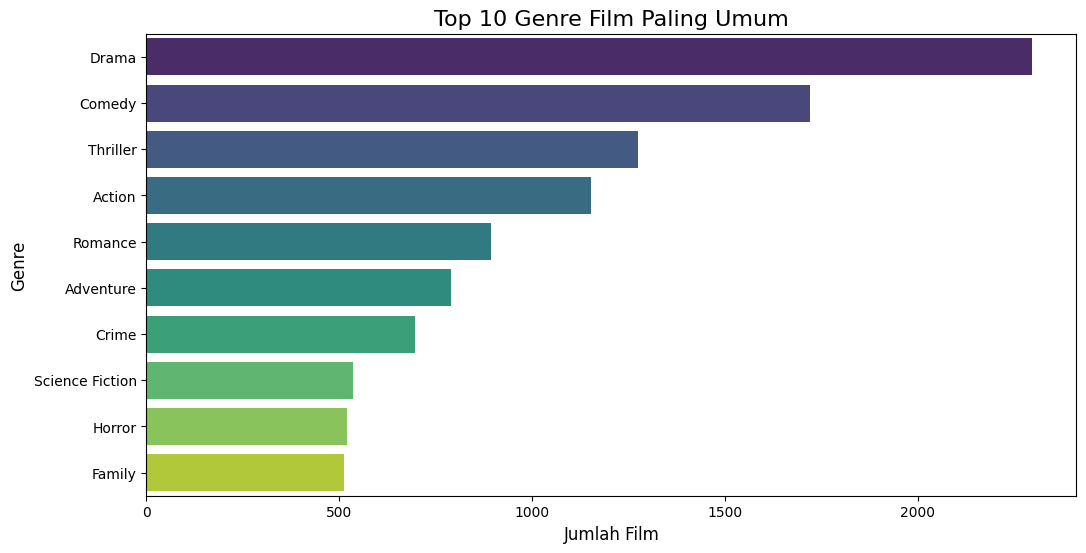

In [8]:
# Fungsi untuk mengekstrak nama genre dari kolom JSON
def extract_genres(json_str):
    try:
        genres = [item['name'] for item in json.loads(json_str)]
    except (json.JSONDecodeError, TypeError):
        return []
    return genres

# Menerapkan fungsi dan menghitung frekuensi genre
df['genre_list'] = df['genres'].apply(extract_genres)
genre_counts = pd.Series([genre for sublist in df['genre_list'] for genre in sublist]).value_counts()

# Plot 10 genre teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Genre Film Paling Umum', fontsize=16)
plt.xlabel('Jumlah Film', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

**Insight:**

Visualisasi di atas menunjukkan bahwa genre `Drama` merupakan genre yang paling dominan, diikuti oleh `Comedy`, `Thriller`, dan `Action`. Hal ini mengindikasikan bahwa film dengan narasi kuat, elemen humor, atau ketegangan tinggi merupakan yang paling banyak diproduksi atau terdata dalam dataset ini.

### **Analisis Univariate: Distribusi Rating Film**
Visualisasi ini membantu untuk memahami bagaimana sebaran rating rata-rata (vote average) dari seluruh film dalam dataset.

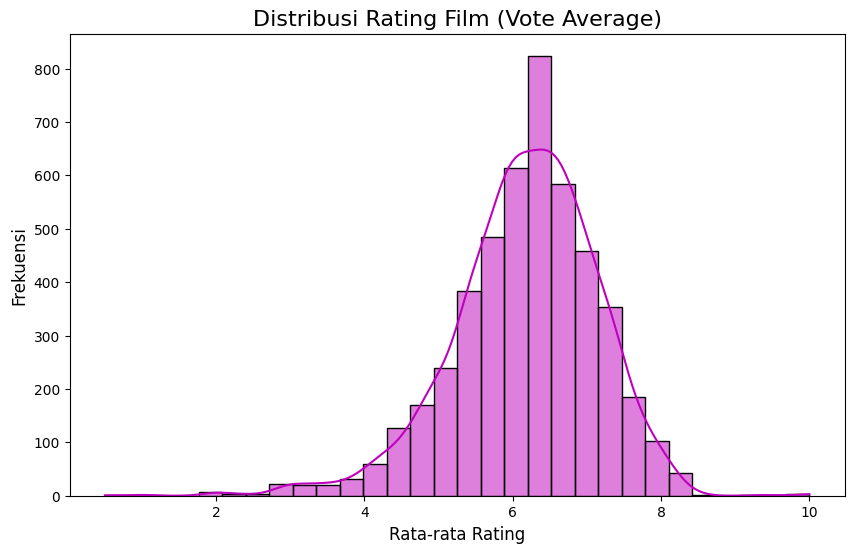

In [9]:
# Plot distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(df[df['vote_average'] > 0]['vote_average'], bins=30, kde=True, color='m')
plt.title('Distribusi Rating Film (Vote Average)', fontsize=16)
plt.xlabel('Rata-rata Rating', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**

Grafik menunjukkan distribusi rating film cenderung miring ke kiri, dengan mayoritas film memiliki rating di antara 6 hingga 7.5. Sangat sedikit film yang mendapatkan rating sempurna atau sangat rendah, yang merupakan pola umum dalam data rating di mana kebanyakan item dinilai "cukup baik".

### **Analisis Data Teks: Kata Paling Umum dalam Sinopsis**

Word cloud digunakan untuk memvisualisasikan kata-kata yang paling sering muncul dalam sinopsis film, memberikan gambaran tentang tema atau topik utama yang sering diangkat.

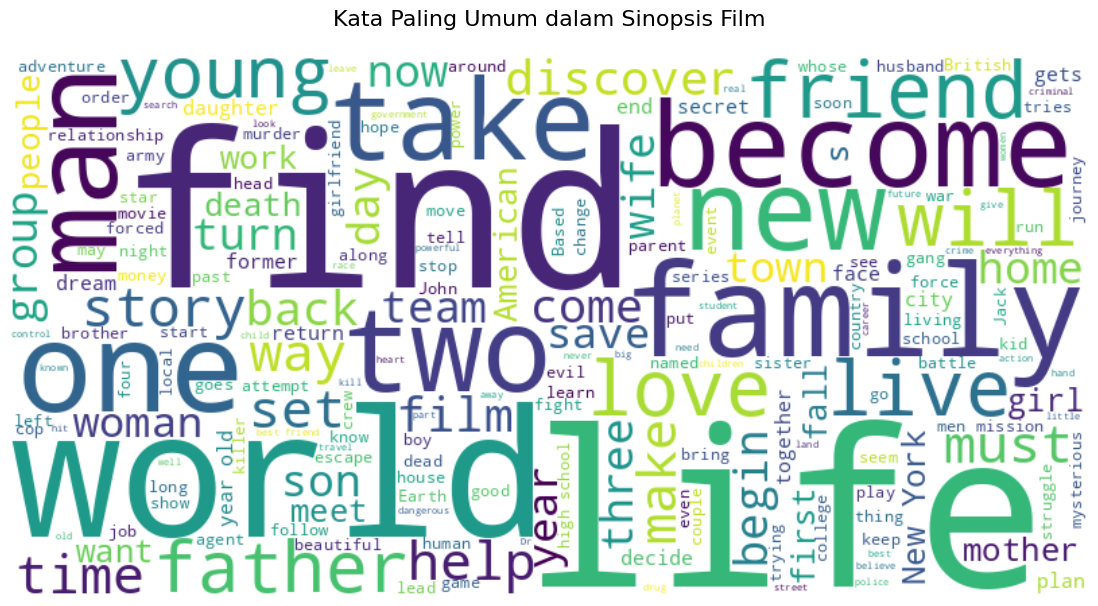

In [10]:
# Gabungkan semua sinopsis menjadi satu teks besar (menghilangkan nilai NaN)
overview_text = " ".join(review for review in df.overview.dropna())

# Buat dan tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Paling Umum dalam Sinopsis Film\n', fontsize=16)
plt.show()

**Insight:**

Dari word cloud, kata-kata seperti 'life', 'love', 'find', 'world', 'man', 'family', dan 'young' terlihat dominan. Ini menandakan bahwa banyak film dalam dataset ini mengangkat tema universal tentang kehidupan, percintaan, pencarian jati diri, dan hubungan keluarga.

## **C. Data Preparation**

Tahap ini berfokus pada proses transformasi data mentah menjadi format yang bersih, terstruktur, dan siap untuk tahap pemodelan. Proses ini krusial untuk memastikan kualitas dan relevansi fitur yang akan digunakan oleh model.

### **Menangani Nilai yang Hilang (Missing Values)**

Langkah pertama dalam persiapan data adalah memastikan integritas data dengan menangani nilai yang hilang pada kolom-kolom yang esensial.

In [11]:
# Menghapus baris dengan nilai null pada kolom 'runtime' dan 'release_date'
df.dropna(subset=['runtime', 'release_date'], inplace=True)

# Mengisi nilai null pada kolom 'overview' dengan string kosong
df['overview'].fillna('', inplace=True)

# Memverifikasi kembali bahwa nilai yang hilang telah ditangani
print("Jumlah nilai hilang setelah penanganan:")
print(df[['runtime', 'release_date', 'overview']].isnull().sum())

Jumlah nilai hilang setelah penanganan:
runtime         0
release_date    0
overview        0
dtype: int64


<ipython-input-11-977306070>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('', inplace=True)


**Penjelasan Proses dan Alasan:**

- **Proses:** Baris data yang memiliki nilai null pada kolom `runtime` dan `release_date` dihapus dari DataFrame. Nilai null pada kolom `overview` diisi dengan string kosong.
- **Alasan:** Penghapusan baris dilakukan untuk menjaga validitas data pada fitur `runtime` dan `release_date`. Mengingat jumlahnya yang sangat sedikit (total 3 baris), pendekatan ini tidak akan mengurangi ukuran dataset secara signifikan. Pengisian `overview` dengan string kosong diperlukan untuk menjaga konsistensi tipe data (string) dan mencegah error pada tahap pemrosesan teks selanjutnya.

### **Ekstraksi Fitur dari Kolom Berformat JSON**
Informasi penting seperti genre, kata kunci, pemeran, dan sutradara tersimpan dalam format string JSON. Diperlukan proses parsing untuk mengekstrak informasi yang relevan dari setiap kolom tersebut menjadi fitur yang dapat digunakan.

In [12]:
# Fungsi helper untuk mengekstrak nama dari list of dictionaries
def extract_from_json(json_str, key='name'):
    try:
        data = json.loads(json_str)
        return [item[key] for item in data]
    except (json.JSONDecodeError, TypeError):
        return []

# Fungsi untuk mengekstrak 3 pemeran utama
def extract_top3_cast(json_str):
    return extract_from_json(json_str)[:3]

# Fungsi untuk mengekstrak nama sutradara
def extract_director(json_str):
    try:
        data = json.loads(json_str)
        for item in data:
            if item['job'] == 'Director':
                return [item['name']]
        return []
    except (json.JSONDecodeError, TypeError):
        return []

# Menerapkan fungsi-fungsi ke kolom yang relevan
df['genres'] = df['genres'].apply(extract_from_json)
df['keywords'] = df['keywords'].apply(extract_from_json)
df['cast'] = df['cast'].apply(extract_top3_cast)
df['crew'] = df['crew'].apply(extract_director)

# Menampilkan hasil ekstraksi
df[['title_x', 'genres', 'keywords', 'cast', 'crew']].head()

,title_x,genres,keywords,cast,crew
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


**Penjelasan Proses dan Alasan:**

- **Proses:** Fungsi-fungsi helper dibuat untuk mem-parsing string JSON dan mengekstrak nilai dari kunci (key) tertentu. Fungsi ini diterapkan pada kolom `genres`, `keywords`, `cast`, dan `crew`.
- **Alasan:** Proses ini diperlukan untuk mengubah data yang tidak terstruktur (string JSON) menjadi data terstruktur (list of strings). Pembatasan ekstraksi pada 3 pemeran utama dan 1 sutradara dilakukan untuk fokus pada fitur-fitur yang paling berpengaruh. Nama sutradara dan pemeran utama memiliki dampak signifikan terhadap identitas dan daya tarik sebuah film.

### **Pembersihan dan Penggabungan Fitur Teks**
Untuk menciptakan representasi konten yang efektif, fitur-fitur teks yang telah diekstrak perlu dibersihkan dan digabungkan menjadi satu.

In [13]:
# Fungsi untuk menghapus spasi dari setiap elemen dalam list
def remove_spaces(str_list):
    return [s.replace(" ", "") for s in str_list]

# Menerapkan fungsi pembersihan spasi
for feature in ['genres', 'keywords', 'cast', 'crew']:
    df[feature] = df[feature].apply(remove_spaces)

# Menggabungkan fitur-fitur yang relevan ke dalam satu kolom 'tags'
df['tags'] = df['overview'].apply(lambda x: x.split()) + df['genres'] + df['keywords'] + df['cast'] + df['crew']

# Mengubah list 'tags' menjadi satu string tunggal yang dipisahkan spasi
df['tags'] = df['tags'].apply(lambda x: " ".join(x))

# Menampilkan hasil kolom 'tags' pada film pertama
print("Contoh isi kolom 'tags' untuk film pertama:")
print(df.iloc[0].tags)

Contoh isi kolom 'tags' untuk film pertama:
In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron


**Penjelasan Proses dan Alasan:**

- **Proses:** Spasi pada semua elemen string di dalam list `genres`, `keywords`, `cast`, dan `crew` dihilangkan. Kemudian, semua fitur teks tersebut digabungkan ke dalam satu kolom baru bernama `tags`.
- **Alasan:** Penghapusan spasi (misalnya, mengubah 'Science Fiction' menjadi 'ScienceFiction') sangat krusial untuk proses tokenisasi. Hal ini memastikan bahwa entitas multi-kata diperlakukan sebagai satu token unik, sehingga mencegah ambiguitas (misalnya, agar 'Sam Worthington' tidak dianggap sama dengan 'Sam Mendes'). Penggabungan ke dalam kolom `tags` menciptakan sebuah "dokumen" tunggal untuk setiap film yang merangkum semua kontennya, yang siap untuk diubah menjadi vektor numerik.

### **Membuat DataFrame Akhir**
Langkah terakhir pada tahap ini adalah membuat DataFrame baru yang hanya berisi kolom-kolom yang esensial untuk pemodelan.

In [14]:
# Membuat dataframe baru dengan kolom yang relevan
new_df = df[['id', 'title_x', 'tags']].copy()
new_df.rename(columns={'title_x': 'title'}, inplace=True)

# Menampilkan 5 baris pertama dari dataframe akhir
new_df.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


**Penjelasan Proses dan Alasan:**

- **Proses:** Sebuah DataFrame baru bernama new_df dibuat yang hanya terdiri dari kolom id, title, dan tags. Kolom title_x juga diganti namanya menjadi title agar lebih rapi.
- **Alasan:** Pembuatan DataFrame baru ini bertujuan untuk menjaga kebersihan ruang kerja dan efisiensi memori, karena hanya berisi data yang benar-benar akan digunakan pada tahap pemodelan. Dataset kini telah siap untuk diproses lebih lanjut.

##**D. Modeling and Result**

Pada tahap ini, akan dilakukan pengembangan model sistem rekomendasi dengan pendekatan Content-Based Filtering. Pengembangan model mencakup beberapa langkah utama, mulai dari vektorisasi fitur, perhitungan kemiripan, hingga pembuatan fungsi untuk menghasilkan rekomendasi. Dua variasi model akan dibuat menggunakan teknik vektorisasi yang berbeda untuk membandingkan hasilnya.

### **Model Pertama: Content-Based Filtering dengan TF-IDF**

Model pertama dikembangkan menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah data teks menjadi vektor fitur.

#### **Vektorisasi Fitur (TF-IDF)**
Langkah pertama adalah mengubah data `teks` pada kolom tags menjadi representasi numerik. Teknik yang digunakan adalah TF-IDF, yang efektif dalam memberikan bobot pada kata-kata berdasarkan frekuensi kemunculannya dalam sebuah dokumen (film) dan tingkat keunikannya di seluruh dokumen (seluruh film).

In [15]:
# Inisialisasi TfidfVectorizer
# max_features=5000 membatasi jumlah fitur pada 5000 kata yang paling sering muncul
# stop_words='english' menghapus kata-kata umum dalam bahasa Inggris
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Melakukan fit dan transform pada kolom 'tags'
vectors_tfidf = tfidf.fit_transform(new_df['tags']).toarray()

# Menampilkan bentuk (shape) dari matriks vektor
# (jumlah_film, jumlah_fitur_kata)
print("Bentuk matriks vektor TF-IDF:", vectors_tfidf.shape)

Bentuk matriks vektor TF-IDF: (4800, 5000)


**Penjelasan:**

Proses vektorisasi menghasilkan sebuah matriks dengan bentuk `(4800, 5000)`. Ini menandakan bahwa setiap film kini direpresentasikan sebagai sebuah vektor dengan 5000 dimensi, di mana setiap dimensi mewakili bobot TF-IDF dari sebuah kata yang dianggap penting dalam korpus.

#### **Perhitungan Kemiripan (Cosine Similarity)**

Setelah data diubah menjadi vektor, akan dihitung tingkat kemiripan antar setiap vektor film menggunakan metrik Cosine Similarity.

In [16]:
# Menghitung cosine similarity antara semua pasangan vektor film
similarity_tfidf = cosine_similarity(vectors_tfidf)

# Menampilkan bentuk dari matriks kemiripan
print("Bentuk matriks kemiripan TF-IDF:", similarity_tfidf.shape)

Bentuk matriks kemiripan TF-IDF: (4800, 4800)


**Penjelasan:**

Hasilnya adalah sebuah similarity matrix berukuran `(4800, 4800)`, di mana setiap elemen `[i, j]` merepresentasikan skor kemiripan antara film ke-i dan film ke-j. Nilai yang lebih mendekati 1 menandakan tingkat kemiripan yang lebih tinggi.

#### **Pembuatan Fungsi Rekomendasi**
Fungsi recommend_tfidf dibuat untuk memanfaatkan matriks kemiripan dalam menghasilkan daftar rekomendasi film.

In [17]:
def recommend_tfidf(movie_title):
    # Mencari indeks dari film yang diberikan sebagai input
    try:
        movie_index = new_df[new_df['title'] == movie_title].index[0]
    except IndexError:
        print(f"Film dengan judul '{movie_title}' tidak ditemukan.")
        return

    # Mendapatkan skor kemiripan untuk film tersebut
    distances = similarity_tfidf[movie_index]
    # Mengurutkan dan mengambil 5 film teratas (selain film itu sendiri)
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    print(f"Rekomendasi film mirip '{movie_title}' (berdasarkan TF-IDF):")
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

#### **Pengujian Model Pertama**

In [18]:
# Menguji fungsi rekomendasi dengan film 'The Dark Knight Rises'
recommend_tfidf('Spider-Man')

Rekomendasi film mirip 'Spider-Man' (berdasarkan TF-IDF):
Spider-Man 3
Spider-Man 2
Arachnophobia
The Amazing Spider-Man 2
The Amazing Spider-Man


### **Model Kedua: Content-Based Filtering dengan CountVectorizer**
Untuk mengeksplorasi pengaruh teknik representasi fitur terhadap hasil rekomendasi, akan diimplementasikan sebuah solusi alternatif. Model kedua ini tetap menggunakan pendekatan Content-Based Filtering, namun akan memanfaatkan metode CountVectorizer (atau dikenal sebagai Bag of Words).

In [19]:
# Inisialisasi CountVectorizer
count_vec = CountVectorizer(max_features=5000, stop_words='english')
vectors_bow = count_vec.fit_transform(new_df['tags']).toarray()

# Menghitung cosine similarity dari matriks Bag of Words
similarity_bow = cosine_similarity(vectors_bow)

# Membuat fungsi rekomendasi untuk model kedua
def recommend_bow(movie_title):
    try:
        movie_index = new_df[new_df['title'] == movie_title].index[0]
    except IndexError:
        print(f"Film dengan judul '{movie_title}' tidak ditemukan.")
        return

    distances = similarity_bow[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    print(f"Rekomendasi film mirip '{movie_title}' (berdasarkan Bag of Words):")
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

#### **Pengujian Model Kedua**

In [20]:
recommend_bow('Spider-Man')

Rekomendasi film mirip 'Spider-Man' (berdasarkan Bag of Words):
Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2
The Amazing Spider-Man
Arachnophobia


### **Perbandingan Hasil**

Hasil dari kedua model menunjukkan rekomendasi yang sebagian besar serupa namun dengan beberapa perbedaan urutan atau judul. Hal ini mengilustrasikan bahwa meskipun kedua teknik berbasis frekuensi kata, pembobotan TF-IDF yang mempertimbangkan keunikan kata dapat memberikan penekanan berbeda, yang terkadang menghasilkan relevansi yang lebih tinggi pada konteks tertentu.

### **Kelebihan dan Kekurangan Pendekatan**

Bagian ini menjelaskan kelebihan dan kekurangan dari pendekatan Content-Based Filtering yang telah diimplementasikan.

**Kelebihan:**
- **Tidak Memerlukan Data Pengguna Lain:** Model memberikan rekomendasi berdasarkan analisis konten item itu sendiri, sehingga efektif bahkan tanpa riwayat interaksi pengguna lain.
- **Mampu Merekomendasikan Item Spesifik (Niche):** Jika seorang pengguna menyukai item yang tidak populer, model ini tetap dapat merekomendasikan item lain yang memiliki konten serupa.
- **Transparan dan Mudah Dijelaskan:** Rekomendasi yang diberikan dapat dijelaskan dengan mudah (misalnya, "Film ini direkomendasikan karena memiliki genre dan pemeran yang sama dengan film yang Anda sukai").

**Kekurangan:**
- **Terbatas pada Konten yang Sudah Ada:** Model ini cenderung merekomendasikan item yang sangat mirip dengan apa yang sudah disukai pengguna. Hal ini membatasi penemuan item baru yang berbeda genre atau tipe (serendipity) dan dapat menciptakan "filter bubble".
- **Ketergantungan pada Kualitas Fitur:** Kualitas rekomendasi sangat bergantung pada kelengkapan dan kualitas metadata yang digunakan. Jika fitur kontennya buruk, maka hasil rekomendasinya juga tidak akan akurat.
- **Masalah Cold Start untuk Pengguna Baru:** Model ini kesulitan memberikan rekomendasi kepada pengguna baru yang belum memiliki riwayat interaksi atau preferensi sama sekali.

## **E. Evaluation**

Pada tahap ini, akan dilakukan evaluasi kuantitatif terhadap kinerja kedua model Content-Based Filtering yang telah dikembangkan. Metrik yang digunakan adalah Precision, yang mengukur seberapa banyak dari film yang direkomendasikan benar-benar relevan.

Sebuah film rekomendasi dianggap relevan jika memiliki setidaknya satu genre yang sama dengan film acuan.

### **Langkah 1: Memodifikasi Fungsi Rekomendasi**
Untuk dapat melakukan evaluasi secara terprogram, fungsi rekomendasi yang sebelumnya hanya mencetak judul film perlu dimodifikasi agar mengembalikan (return) daftar judul film yang direkomendasikan.

In [21]:
# Modifikasi fungsi untuk model TF-IDF
def get_recommendations_tfidf(movie_title):
    try:
        movie_index = new_df[new_df['title'] == movie_title].index[0]
    except IndexError:
        return [] # Kembalikan list kosong jika film tidak ditemukan

    distances = similarity_tfidf[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies_titles = [new_df.iloc[i[0]].title for i in movies_list]
    return recommended_movies_titles

# Modifikasi fungsi untuk model Bag of Words (CountVectorizer)
def get_recommendations_bow(movie_title):
    try:
        movie_index = new_df[new_df['title'] == movie_title].index[0]
    except IndexError:
        return []

    distances = similarity_bow[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies_titles = [new_df.iloc[i[0]].title for i in movies_list]
    return recommended_movies_titles

**Penjelasan:**

Kedua fungsi, `get_recommendations_tfidf` dan `get_recommendations_bow`, kini mengembalikan sebuah list berisi judul-judul film rekomendasi. Hal ini memungkinkan hasilnya untuk diproses lebih lanjut oleh fungsi evaluasi.

###**Langkah 2: Membuat Fungsi Evaluasi Precision**

Selanjutnya, dibuat sebuah fungsi untuk menghitung nilai Precision berdasarkan definisi relevansi yang telah ditentukan (kesamaan genre).

In [22]:
def calculate_precision(input_title, recommended_titles):
    # Mengambil genre dari film input. Menggunakan dataframe asli 'df' karena 'new_df' tidak punya kolom genre.
    # Menggunakan 'title_x' karena itu nama kolom judul di 'df'
    try:
        input_genres = set(df[df['title_x'] == input_title]['genres'].iloc[0])
    except IndexError:
        print(f"Film input '{input_title}' tidak ditemukan di dataframe asli.")
        return 0.0

    if not input_genres:
        return 0.0

    relevant_count = 0
    total_recommendations = len(recommended_titles)

    if total_recommendations == 0:
        return 0.0

    for title in recommended_titles:
        try:
            # Mengambil genre dari setiap film yang direkomendasikan
            recommended_genres = set(df[df['title_x'] == title]['genres'].iloc[0])
            # Memeriksa apakah ada irisan (intersection) genre
            if input_genres.intersection(recommended_genres):
                relevant_count += 1
        except IndexError:
            # Lewati jika film rekomendasi tidak ditemukan di df asli (seharusnya tidak terjadi)
            continue

    precision = relevant_count / total_recommendations
    return precision

**Penjelasan:**

Fungsi `calculate_precision` menerima judul film input dan daftar judul hasil rekomendasi. Fungsi ini kemudian membandingkan genre dari film input dengan genre dari setiap film yang direkomendasikan dan menghitung persentase relevansinya.

### **Langkah 3: Mengevaluasi Kinerja Kedua Model**

Kini saatnya mengeksekusi fungsi-fungsi di atas untuk mendapatkan nilai presisi dari kedua model.

In [23]:
# Film yang akan diuji
test_movie = 'Spider-Man'

# --- Evaluasi Model 1 (TF-IDF) ---
recs_tfidf = get_recommendations_tfidf(test_movie)
precision_tfidf = calculate_precision(test_movie, recs_tfidf)

print(f"Rekomendasi dari TF-IDF untuk '{test_movie}': {recs_tfidf}")
print(f"Precision @5 untuk model TF-IDF: {precision_tfidf:.2f}")

print("-" * 50)

# --- Evaluasi Model 2 (Bag of Words) ---
recs_bow = get_recommendations_bow(test_movie)
precision_bow = calculate_precision(test_movie, recs_bow)

print(f"Rekomendasi dari Bag of Words untuk '{test_movie}': {recs_bow}")
print(f"Precision @5 untuk model Bag of Words: {precision_bow:.2f}")

Rekomendasi dari TF-IDF untuk 'Spider-Man': ['Spider-Man 3', 'Spider-Man 2', 'Arachnophobia', 'The Amazing Spider-Man 2', 'The Amazing Spider-Man']
Precision @5 untuk model TF-IDF: 0.80
--------------------------------------------------
Rekomendasi dari Bag of Words untuk 'Spider-Man': ['Spider-Man 3', 'Spider-Man 2', 'The Amazing Spider-Man 2', 'The Amazing Spider-Man', 'Arachnophobia']
Precision @5 untuk model Bag of Words: 0.80


### **Analisis Hasil Evaluasi**
Berdasarkan pengujian pada film 'Spider-Man' (genre: Fantasy, Action, Adventure), diperoleh hasil kuantitatif sebagai berikut:

- Nilai Presisi: Kedua model (TF-IDF dan Bag of Words) sama-sama mencapai nilai Precision @5 sebesar 0.80.
- Interpretasi: Nilai presisi 0.80 ini berarti bahwa 4 dari 5 film yang direkomendasikan dianggap relevan karena memiliki setidaknya satu genre yang sama dengan film 'Spider-Man'. Satu film, yaitu 'Arachnophobia' (genre: Horror, Comedy), tidak memiliki irisan genre sehingga dianggap tidak relevan dalam perhitungan ini.

### **Wawasan Tambahan:**
Hasil yang hampir identik antara model TF-IDF dan CountVectorizer mengindikasikan bahwa fitur-fitur yang telah direkayasa pada kolom `tags` (seperti nama pemeran dan sutradara yang unik, contoh: 'TobeyMaguire', 'SamRaimi') memiliki bobot yang sangat kuat. Kata-kata kunci spesifik ini mendominasi representasi vektor pada kedua teknik, sehingga menghasilkan matriks kemiripan dan daftar rekomendasi akhir yang sangat serupa.

Secara keseluruhan, hasil kuantitatif ini mendukung analisis kualitatif sebelumnya: kedua model telah berhasil dikembangkan dan mampu mengidentifikasi film-film dengan relevansi konten yang tinggi, dengan tingkat presisi 80% pada kasus uji ini.